# HW 4 - Murat Teksin 504211325

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras as ks


import matplotlib.pyplot as plt

from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import chisquare
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, LSTM, Embedding
from keras.utils import np_utils
import matplotlib.pyplot as plt
import time
from sklearn import tree
from sklearn.utils import shuffle
from keras.utils import to_categorical

Using TensorFlow backend.


# Q1

For this question we are going to use [1994 Census Adult Data Set](https://archive.ics.uci.edu/ml/datasets/adult).

Construct 

- Logistic regression
- SVM
- KNN
- Decision tree
- Gradient Boost (XGBoost)
- Neural network

models for the data. Cross-validate your models and measure the accuracies. Compare them putting the accuracies in a table.

In [26]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [28]:
x = data.iloc[:,[2,4,10,11,12]]

In [34]:
def helper(x):
    if ('<=' in x):
        return 0
    else:
        return 1
    
y = [helper(x) for x in data.iloc[:,14]]




#  Data Splitting

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
start=time.time()
LoR_model = LogisticRegression().fit(x_train,y_train)
LoR_predicted = LoR_model.predict(x_test)
end=time.time()
LoR_time = (end-start)

In [102]:
LoR_cm=confusion_matrix(y_test,LoR_predicted)
ch_LoR = chisquare(LoR_cm,axis=None)
accuracy_score(y_test,LoR_predicted)

0.7988638108398587

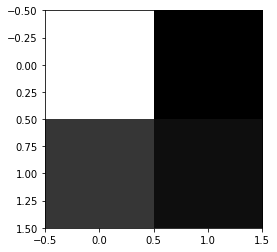

In [54]:
plt.imshow(LoR_cm,cmap='gray')

In [98]:
start=time.time()

SVC_Model = SVC(C=2.0,
                kernel='poly',
                max_iter=10000).fit(x_train,y_train)
SVC_Predict = SVC_Model.predict(x_test)
end=time.time()
SVC_time = (end-start)

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [99]:
SVC_cm = confusion_matrix(y_test,SVC_Predict)
accuracy_score(y_test,SVC_Predict)

0.2418240442192538

In [82]:
ch_SVC = chisquare(SVC_cm,axis=None)

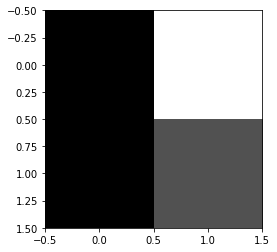

In [83]:
plt.imshow(SVC_cm,cmap ='gray')

In [84]:
start=time.time()
KNN_Model = KNeighborsClassifier().fit(x_train,y_train)
KNN_Predict = KNN_Model.predict(x_test)
end=time.time()
KNN_time = (end-start)

In [94]:
KNN_cm = confusion_matrix(y_test,KNN_Predict)
ch_KNN = chisquare(KNN_cm,axis=None)
accuracy_score(y_test,KNN_Predict)

0.7795178873023184

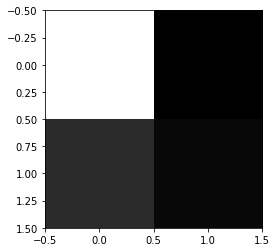

In [87]:
plt.imshow(KNN_cm,cmap='gray')

In [91]:
classifier = DecisionTreeClassifier(max_depth=2, criterion='entropy')
classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)

0.8036235221863964

[Text(1860.0, 3020.0, 'X[2] <= 5119.0\nentropy = 0.796\nsamples = 26048\nvalue = [19778, 6270]'),
 Text(930.0, 1812.0, 'X[1] <= 12.5\nentropy = 0.732\nsamples = 24794\nvalue = [19712, 5082]'),
 Text(465.0, 604.0, 'entropy = 0.583\nsamples = 19050\nvalue = [16389, 2661]'),
 Text(1395.0, 604.0, 'entropy = 0.982\nsamples = 5744\nvalue = [3323, 2421]'),
 Text(2790.0, 1812.0, 'X[2] <= 7073.5\nentropy = 0.297\nsamples = 1254\nvalue = [66, 1188]'),
 Text(2325.0, 604.0, 'entropy = 0.909\nsamples = 148\nvalue = [48, 100]'),
 Text(3255.0, 604.0, 'entropy = 0.12\nsamples = 1106\nvalue = [18, 1088]')]

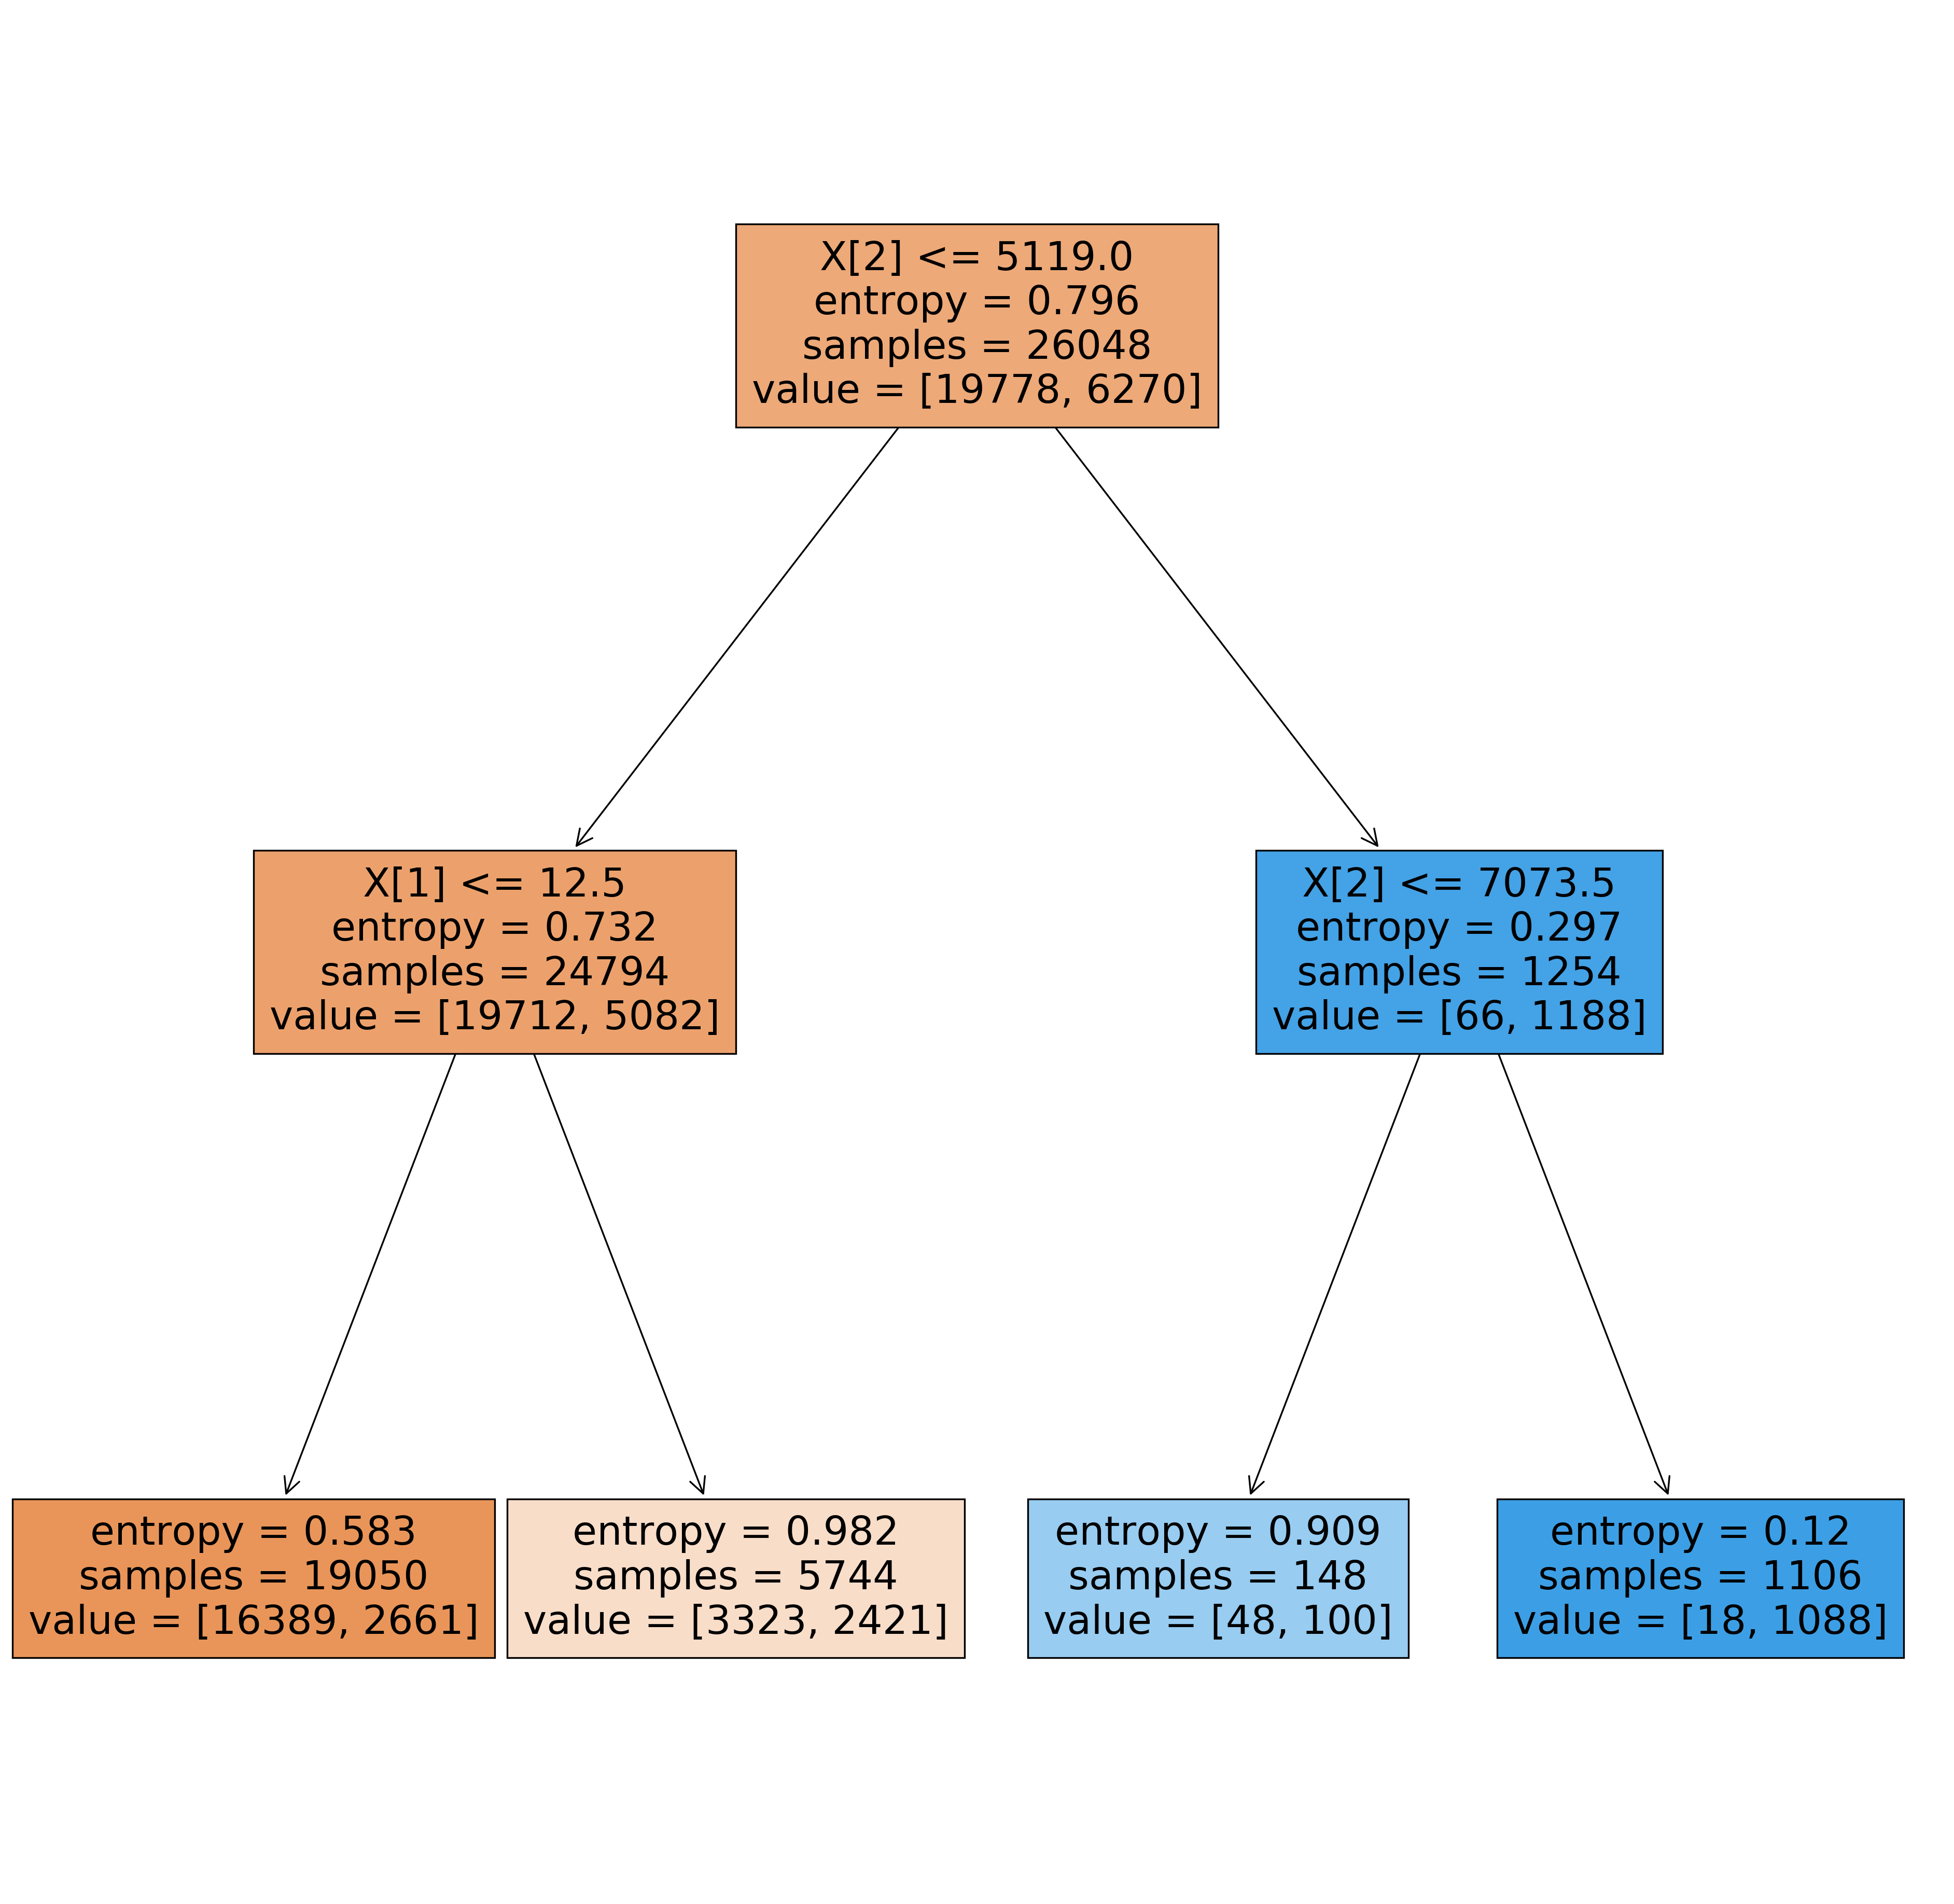

In [107]:
plt.figure(figsize=(20,20), dpi=240)
tree.plot_tree(classifier,
               filled = True)

In [108]:
import xgboost as xgb

In [114]:
from xgboost import XGBClassifier

In [115]:
xgb = XGBClassifier().fit(x_train,y_train)

In [116]:
xgb_pred= xgb.predict(x_test)

In [117]:
XGB_cm = confusion_matrix(y_test,xgb_pred)
ch_XGB= chisquare(xgb_pred,axis=None)
accuracy_score(y_test,xgb_pred)

0.8404729003531399

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [120]:
x_train.shape[1]

5

In [140]:
ann_model = Sequential()
ann_model.add(Dense(5,activation='relu'))
ann_model.add(Dense(50,activation='relu'))
ann_model.add(Dense(20,activation='relu'))
ann_model.add(Dense(1,activation='sigmoid'))
ann_model.compile(optimizer='adam',loss='mse')

In [145]:
ann_model.fit(x_train.values,np.array(y_train),epochs=100,batch_size=128,validation_data=(x_test.values,np.array(y_test)))

Train on 26048 samples, validate on 6513 samples
Epoch 1/100
26048/26048 [==============================] - 0s 13us/sample - loss: 0.2407 - val_loss: 0.2412
Epoch 2/100
26048/26048 [==============================] - 0s 12us/sample - loss: 0.2407 - val_loss: 0.2412
Epoch 3/100
26048/26048 [==============================] - 0s 13us/sample - loss: 0.2407 - val_loss: 0.2412
Epoch 4/100
26048/26048 [==============================] - 0s 13us/sample - loss: 0.2407 - val_loss: 0.2412
Epoch 5/100
26048/26048 [==============================] - 0s 14us/sample - loss: 0.2407 - val_loss: 0.2412
Epoch 6/100
26048/26048 [==============================] - 0s 13us/sample - loss: 0.2407 - val_loss: 0.2412
Epoch 7/100
26048/26048 [==============================] - 0s 13us/sample - loss: 0.2407 - val_loss: 0.2412
Epoch 8/100
26048/26048 [==============================] - 0s 13us/sample - loss: 0.2407 - val_loss: 0.2412
Epoch 9/100
26048/26048 [==============================] - 0s 14us/sample - loss: 0.240

In [148]:
ann_predictions = ann_model.predict_classes(x_test.values)

In [149]:
print(confusion_matrix(y_test,ann_predictions))

[[4942    0]
 [1571    0]]


In [150]:
accuracy_score(y_test,ann_predictions)

0.7587901120835252

In [139]:
losses = pd.DataFrame(ann_model.history.history)

# Q2

For this question we are going to use [the Dry Bean Dataset](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset):

Construct 

- Logistic regression
- SVM
- KNN
- Decision tree
- Gradient Boost (XGBoost)
- Neural network

models for the data. Cross-validate your models and measure the accuracies. Compare them putting the accuracies in a table.

In [213]:
with urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip') as url:
    zf = ZipFile(BytesIO(url.read()))
    data = pd.read_excel(zf.open('DryBeanDataset/Dry_Bean_Dataset.xlsx'))
    
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [246]:
x = data.iloc[:,:-1]

In [282]:
def helper(x):
    if ('SEKER' in x):
        return 0 
    elif ('BARBUNYA' in x):
        return 1
    elif ('BOMBAY' in x):
        return 2
    elif ('CALI' in x):
        return 3
    elif ('DERMASON' in x):
        return 4
    elif ('HOROZ' in x):
        return 5
    elif ('SIRA' in x):
        return 6
y = [helper(x) for x in data.iloc[:,16]]
y= np.array(y).astype('int')


In [283]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [284]:
start=time.time()
LoR_model = LogisticRegression().fit(x_train,y_train)
LoR_predicted = LoR_model.predict(x_test)
end=time.time()
LoR_time = (end-start)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [285]:
LoR_cm=confusion_matrix(y_test,LoR_predicted)
ch_LoR = chisquare(LoR_cm,axis=None)
accuracy_score(y_test,LoR_predicted)

0.6856408373117885

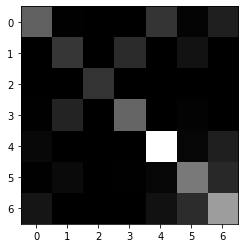

In [286]:
plt.imshow(LoR_cm,cmap='gray')

In [287]:
start=time.time()

SVC_Model = SVC(C=2.0,
                kernel='poly',
                max_iter=10000).fit(x_train,y_train)
SVC_Predict = SVC_Model.predict(x_test)
end=time.time()
SVC_time = (end-start)

In [288]:
SVC_cm = confusion_matrix(y_test,SVC_Predict)
accuracy_score(y_test,SVC_Predict)

0.6202717590892398

In [289]:
ch_SVC = chisquare(SVC_cm,axis=None)

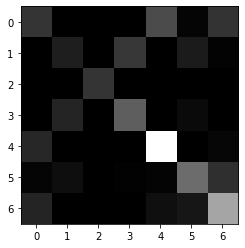

In [290]:
plt.imshow(SVC_cm,cmap ='gray')

In [291]:
start=time.time()
KNN_Model = KNeighborsClassifier().fit(x_train,y_train)
KNN_Predict = KNN_Model.predict(x_test)
end=time.time()
KNN_time = (end-start)

In [292]:
KNN_cm = confusion_matrix(y_test,KNN_Predict)
ch_KNN = chisquare(KNN_cm,axis=None)
accuracy_score(y_test,KNN_Predict)

0.7194271024605214

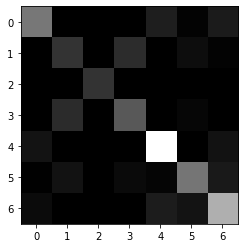

In [293]:
plt.imshow(KNN_cm,cmap='gray')

In [294]:
classifier = DecisionTreeClassifier(max_depth=2, criterion='entropy')
classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)

0.6210062431142123

[Text(1860.0, 3020.0, 'X[2] <= 327.969\nentropy = 2.642\nsamples = 10888\nvalue = [1614, 1061, 405, 1313, 2875, 1520, 2100]'),
 Text(930.0, 1812.0, 'X[3] <= 183.493\nentropy = 1.74\nsamples = 6624\nvalue = [1611, 101, 0, 6, 2875, 117, 1914]'),
 Text(465.0, 604.0, 'entropy = 0.841\nsamples = 3218\nvalue = [28, 1, 0, 0, 2656, 106, 427]'),
 Text(1395.0, 604.0, 'entropy = 1.483\nsamples = 3406\nvalue = [1583, 100, 0, 6, 219, 11, 1487]'),
 Text(2790.0, 1812.0, 'X[12] <= 0.006\nentropy = 2.062\nsamples = 4264\nvalue = [3, 960, 405, 1307, 0, 1403, 186]'),
 Text(2325.0, 604.0, 'entropy = 1.564\nsamples = 2642\nvalue = [2, 931, 405, 1265, 0, 28, 11]'),
 Text(3255.0, 604.0, 'entropy = 0.795\nsamples = 1622\nvalue = [1, 29, 0, 42, 0, 1375, 175]')]

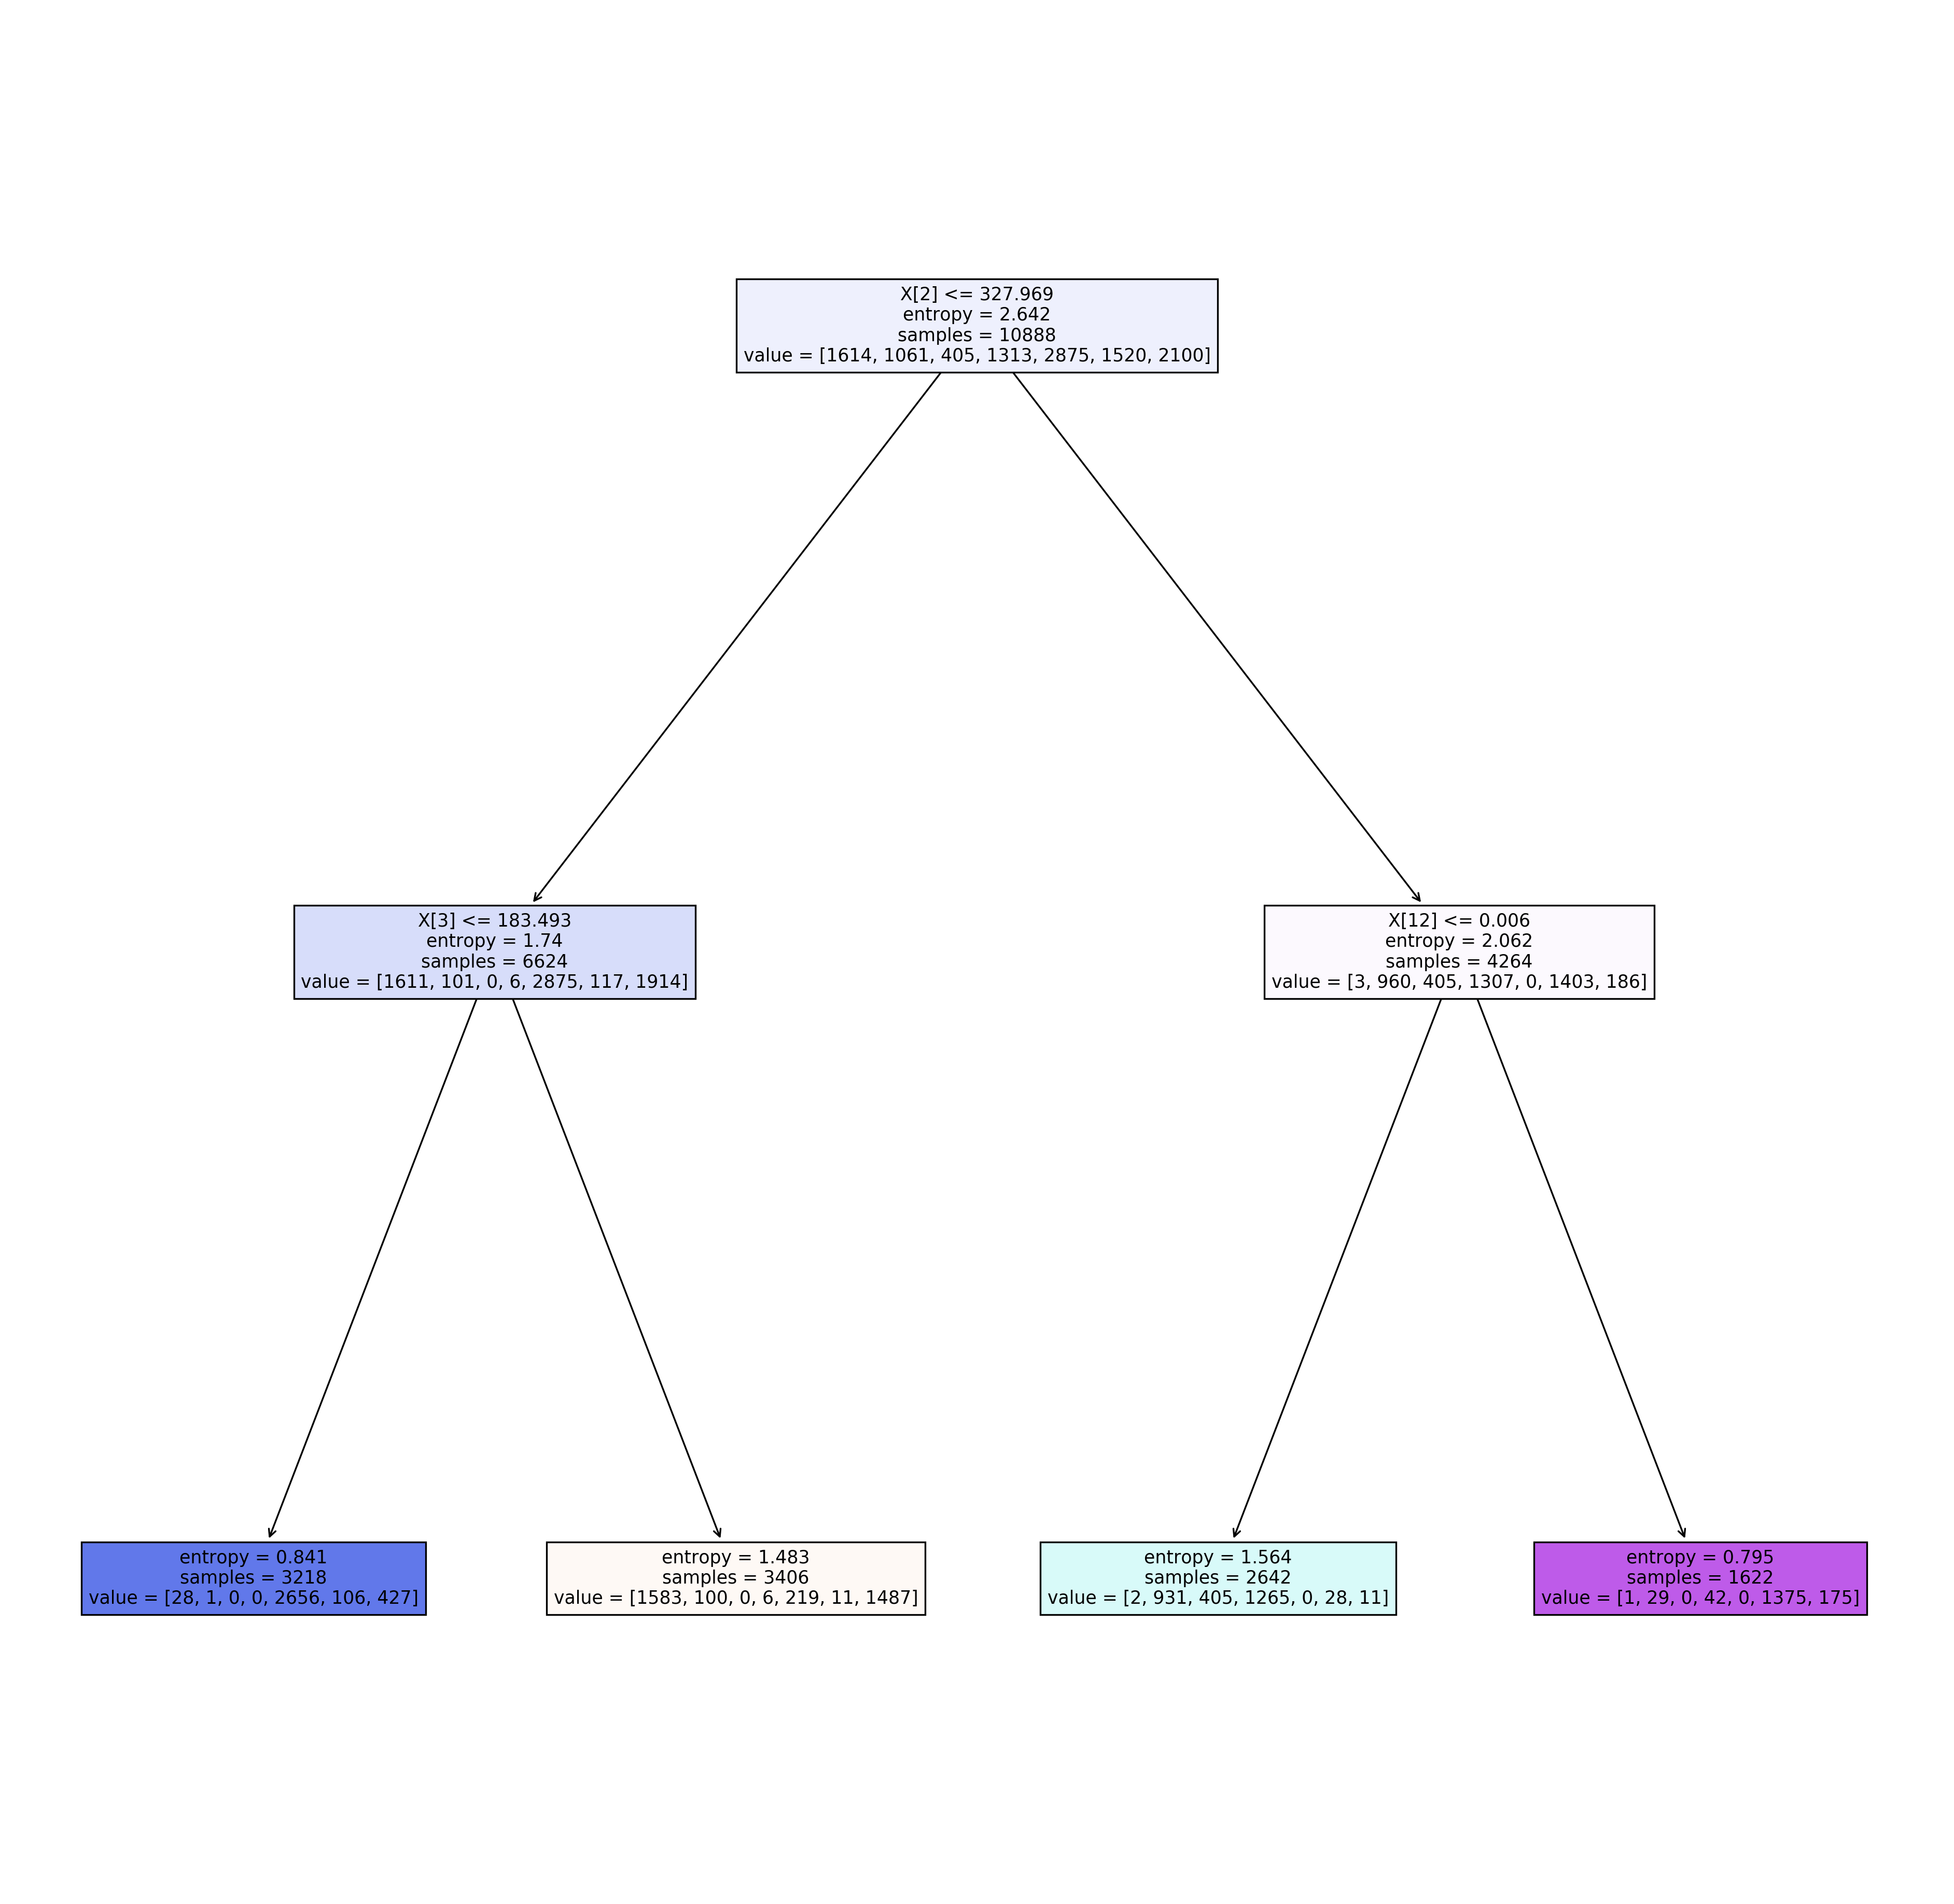

In [295]:
plt.figure(figsize=(20,20), dpi=240)
tree.plot_tree(classifier,
               filled = True)

In [296]:
import xgboost as xgb

In [297]:
from xgboost import XGBClassifier

In [298]:
xgb = XGBClassifier().fit(x_train,y_train)

In [299]:
xgb_pred= xgb.predict(x_test)

In [300]:
XGB_cm = confusion_matrix(y_test,xgb_pred)
ch_XGB= chisquare(xgb_pred,axis=None)
accuracy_score(y_test,xgb_pred)

0.9250826294528094

In [301]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [314]:
ann_model = Sequential()
ann_model.add(Dense(16,activation='relu'))
ann_model.add(Dense(10,activation='relu'))
ann_model.add(Dense(10,activation='relu'))
ann_model.add(Dense(7,activation='sigmoid'))
ann_model.compile(optimizer='adam',loss='mse')

In [315]:
ann_model.fit(x_train.values,np.array(y_train),epochs=100,validation_data=(x_test.values,np.array(y_test)))

Train on 10888 samples, validate on 2723 samples
Epoch 1/100
10888/10888 [==============================] - 1s 79us/sample - loss: 11.7826 - val_loss: 11.8804
Epoch 2/100
10888/10888 [==============================] - 1s 51us/sample - loss: 11.7826 - val_loss: 11.8804
Epoch 3/100
10888/10888 [==============================] - 1s 47us/sample - loss: 11.7826 - val_loss: 11.8804
Epoch 4/100
10888/10888 [==============================] - 1s 51us/sample - loss: 11.7826 - val_loss: 11.8804
Epoch 5/100
10888/10888 [==============================] - 1s 50us/sample - loss: 11.7826 - val_loss: 11.8804
Epoch 6/100
10888/10888 [==============================] - 1s 49us/sample - loss: 11.7826 - val_loss: 11.8804
Epoch 7/100
10888/10888 [==============================] - 1s 49us/sample - loss: 11.7826 - val_loss: 11.8804
Epoch 8/100
10888/10888 [==============================] - 1s 50us/sample - loss: 11.7826 - val_loss: 11.8804
Epoch 9/100
10888/10888 [==============================] - 1s 49us/samp

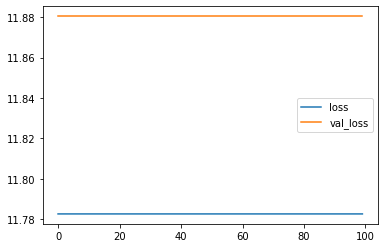

In [316]:
model_loss = pd.DataFrame(ann_model.history.history)
model_loss.plot()

In [309]:
ann_predictions = ann_model.predict_classes(x_test.values)

In [310]:
print(confusion_matrix(y_test,ann_predictions))

[[413   0   0   0   0   0   0]
 [261   0   0   0   0   0   0]
 [117   0   0   0   0   0   0]
 [317   0   0   0   0   0   0]
 [671   0   0   0   0   0   0]
 [408   0   0   0   0   0   0]
 [536   0   0   0   0   0   0]]


In [306]:
accuracy_score(y_test,ann_predictions)

0.09585016525890562

In [139]:
losses = pd.DataFrame(ann_model.history.history)

# Q3

For this question we are going to use the [Japanese MNIST](https://github.com/rois-codh/kmnist) dataset.

Construct a convolutional neural network model for the dataset and cross-validate your model.

In [41]:
train_x = np.load("./kmnist-train-imgs.npz")['arr_0'].reshape(60000,28,28,1)
train_y = np.load("./kmnist-train-labels.npz")['arr_0']
test_x = np.load("./kmnist-test-imgs.npz")['arr_0'].reshape(10000,28,28,1)
test_y = np.load("./kmnist-test-labels.npz")['arr_0']

In [15]:
train_y = to_categorical(train_y,49)

In [16]:
train_img, train_lbl = shuffle(train_x, train_y, random_state = 0)

In [20]:
train_imgs = train_img[:50000]
train_lbls = train_lbl[:50000]
valid_imgs = train_img[50000:]
valid_lbls = train_lbl[50000:]

# One of the train set image 

Text(0.5, 1.0, 'The label of the image: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]')

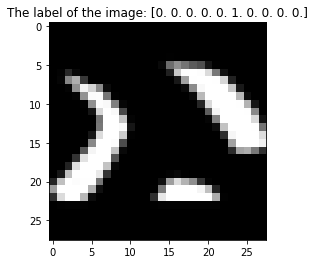

In [6]:
plt.imshow(train_x[10,:,:,0],cmap='gray')
plt.title('The label of the image: '+str(train_y[10]))

# Model Construction 

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [21]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
#Output Layer
# multi class
model.add(Dense(49,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.fit(train_imgs,train_lbls,epochs=10,batch_size=250,validation_data=(valid_imgs,valid_lbls))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 14s 283us/sample - loss: 0.2567 - accuracy: 0.9283 - val_loss: 0.2389 - val_accuracy: 0.9305
Epoch 2/10
50000/50000 [==============================] - 15s 297us/sample - loss: 0.1358 - accuracy: 0.9596 - val_loss: 0.2059 - val_accuracy: 0.9396
Epoch 3/10
50000/50000 [==============================] - 14s 287us/sample - loss: 0.0808 - accuracy: 0.9754 - val_loss: 0.1842 - val_accuracy: 0.9494
Epoch 4/10
50000/50000 [==============================] - 15s 296us/sample - loss: 0.0477 - accuracy: 0.9862 - val_loss: 0.1824 - val_accuracy: 0.9526
Epoch 5/10
50000/50000 [==============================] - 15s 294us/sample - loss: 0.0285 - accuracy: 0.9920 - val_loss: 0.1747 - val_accuracy: 0.9556
Epoch 6/10
50000/50000 [==============================] - 15s 292us/sample - loss: 0.0177 - accuracy: 0.9951 - val_loss: 0.1840 - val_accuracy: 0.9574
Epoch 7/10
50000/50000 [====================

In [24]:
metrics = pd.DataFrame(model.history.history)

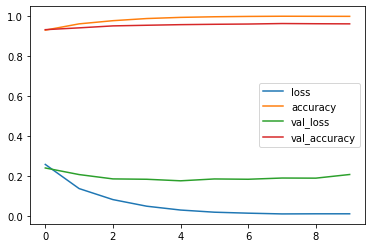

In [26]:
metrics.plot()

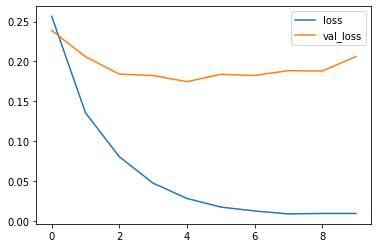

In [27]:
metrics[['loss','val_loss']].plot()

In [42]:
test_y_cat = to_categorical(test_y,49)

In [43]:
model.evaluate(test_x,test_y_cat,verbose=0)

[0.5895908927991986, 0.8985]

In [44]:
predictions = model.predict_classes(test_x)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(test_y,predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1000
           1       0.86      0.92      0.89      1000
           2       0.83      0.86      0.85      1000
           3       0.93      0.95      0.94      1000
           4       0.90      0.84      0.87      1000
           5       0.94      0.87      0.90      1000
           6       0.89      0.92      0.91      1000
           7       0.93      0.87      0.90      1000
           8       0.93      0.91      0.92      1000
           9       0.90      0.92      0.91      1000
          41       0.00      0.00      0.00         0

    accuracy                           0.90     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.90      0.90      0.90     10000



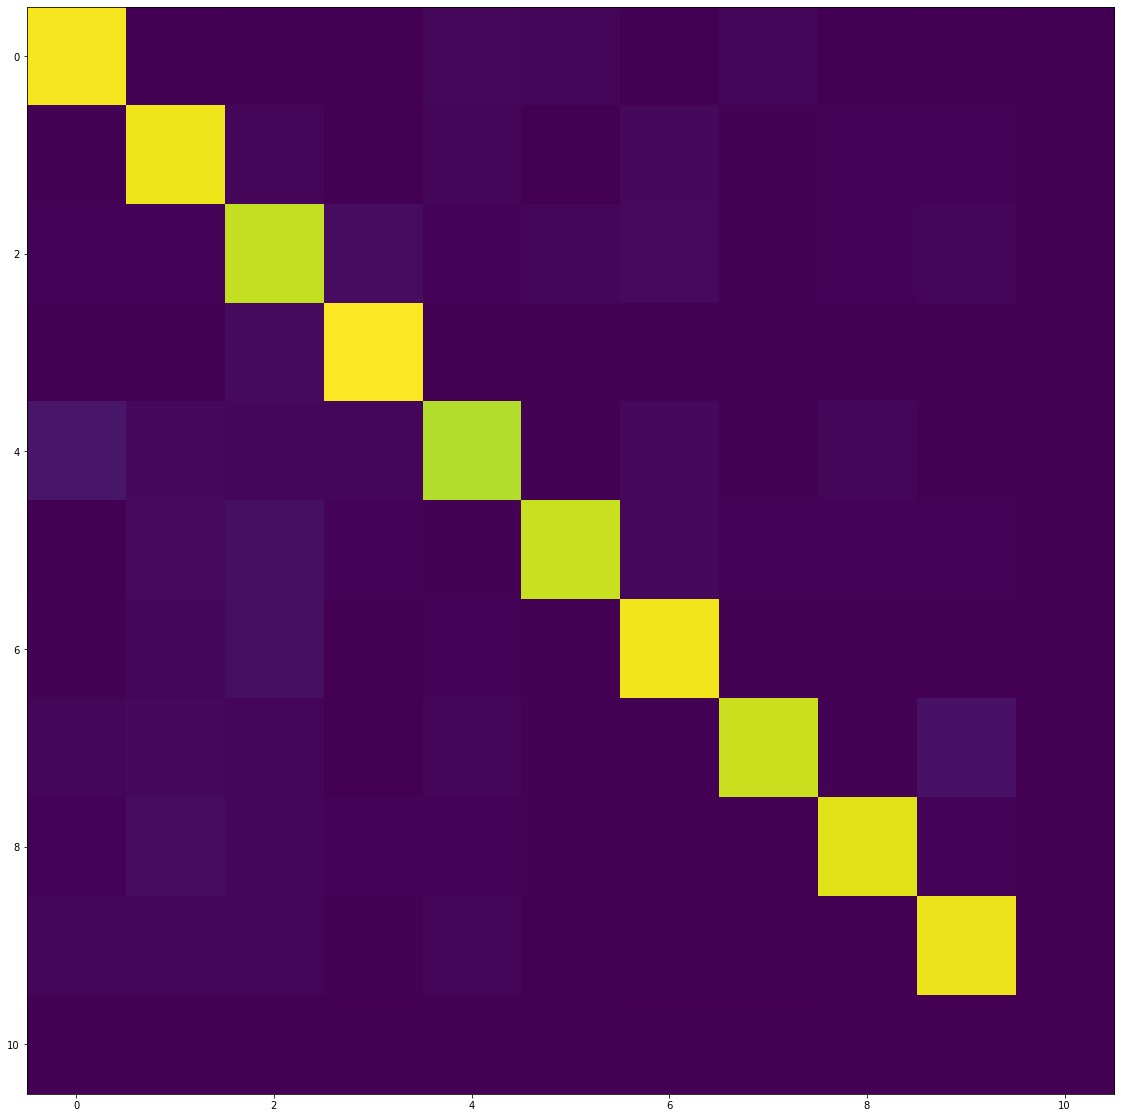

In [48]:
plt.figure(figsize=(20,20))
plt.imshow(confusion_matrix(test_y,predictions))

# Q4

For this question we are going to use Box and Jenkins Airline Passenger Dataset. For this dataset, please install the `rdatasets` library:

In [53]:
#!pip install rdatasets
from rdatasets import data

  Created wheel for rdatasets: filename=rdatasets-0.1.0-py3-none-any.whl size=19168577 sha256=689f84bba2e6b2af6b20007beb8040548a5b6b5981440131a62aecf38d92306a
  Stored in directory: c:\users\mteks\appdata\local\pip\cache\wheels\ef\4e\d6\f967f2312216a7d44046043e44ccb8bc227c7df236fa6e7b11
Successfully built rdatasets


You should consider upgrading via the 'd:\anaconda\python.exe -m pip install --upgrade pip' command.


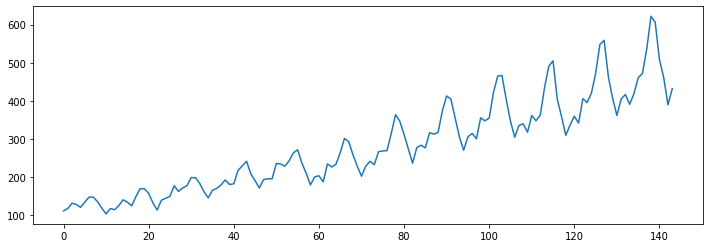

In [68]:
airline = data('AirPassengers')

plt.figure(figsize=(12,4))
airline['value'].plot()

In [73]:
train = airline['value'][:122].values.reshape(122,1)
test = airline['value'][120:].values.reshape(24,1)

Construct

- recurrent 
- LSTM

netural network models on the train set (the first 122 values), and then test it on the last 24 values.

# Scaling 

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [75]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [76]:
train_sc = scaler.transform(train)
test_sc = scaler.transform(test)

In [114]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# Let's redefine to get 12 months back and then predict the next month out
length = 12
generator = TimeseriesGenerator(train_sc, train_sc, length=length, batch_size=1)

In [115]:
from tensorflow.keras.layers import LSTM

In [116]:
# define model
model_rnn = Sequential()
model_rnn.add(LSTM(100, activation='relu', input_shape=(length, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mse')

In [117]:
validation_generator = TimeseriesGenerator(test_sc,test_sc, length=length, batch_size=1)

In [118]:
# fit model
model_rnn.fit_generator(generator,epochs=20,
                    validation_data=validation_generator)

W0516 00:29:52.099176  5132 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']
W0516 00:29:52.139054  5132 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 110 steps, validate for 12 steps
Epoch 1/20
110/110 [==============================] - 2s 19ms/step - loss: 0.0312 - val_loss: 0.0375
Epoch 2/20
110/110 [==============================] - 1s 7ms/step - loss: 0.0152 - val_loss: 0.0434
Epoch 3/20
110/110 [==============================] - 1s 6ms/step - loss: 0.0123 - val_loss: 0.0694
Epoch 4/20
110/110 [==============================] - 1s 6ms/step - loss: 0.0148 - val_loss: 0.0426
Epoch 5/20
110/110 [==============================] - 1s 6ms/step - loss: 0.0107 - val_loss: 0.0223
Epoch 6/20
110/110 [==============================] - 1s 6ms/step - loss: 0.0092 - val_loss: 0.0187
Epoch 7/20
110/110 [==============================] - 1s 6ms/step - loss: 0.0083 - val_loss: 0.0475
Epoch 8/20
110/110 [==============================] - 1s 6ms/step - loss: 0.0089 - val_loss: 0.0096
Epoch 9/20
110/110 [==============================] - 1s 7ms/step - loss: 0.0066 - val_loss: 0.0077
Epoch 10/20
110/110 [==============================] - 1

In [119]:
losses = pd.DataFrame(model_rnn.history.history)

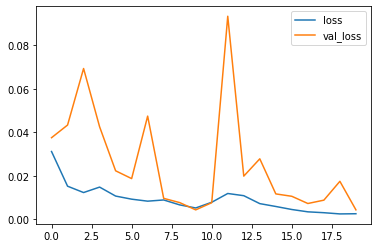

In [120]:
losses.plot()

# Evaluation 

In [133]:
test_predictions = []

first_eval_batch = test_sc[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model_rnn.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [134]:
true_predictions = scaler.inverse_transform(test_predictions)

In [135]:
true_predictions.shape

(24, 1)

In [136]:
test_pred = np.concatenate((test,true_predictions),axis=1)

In [137]:
test_pr = pd.DataFrame(test_pred,columns=['Test Data','Predictions'])

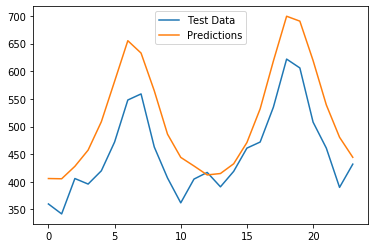

In [138]:
test_pr.plot()